In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd. read_csv("Mall_Customers.csv")
df.shape

(200, 5)

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.drop('CustomerID',axis =1,inplace = True)
df.rename(columns = {"Annual Income (k$)" :"Annual_Income", "Spending Score (1-100)": "Spending_Score" }, inplace= True)
# df['Annual_Income'] = df['Annual_Income'] * 1000
df['Gender'] = np.where(df['Gender']=="Male",1,0)   ### ASsigning 1 to Male and 0 to Femle in gender
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [7]:
#seperating X and y
x = df.iloc[:,0:-1].values   ### Creating X with columns age annual income and gender
y = df.iloc[:,-1]  ###  Creating Y with Spending score

In [8]:
y.shape

(200,)

In [9]:
#### Feature Scaling 
### In KNN Algorithm the Feature scaling is necessary

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [10]:
## importing necessary modules
from sklearn.neighbors import KNeighborsClassifier
#Splitting the data into train and test data
from sklearn.model_selection import train_test_split
#importing classification metrics

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.25,random_state =0)

In [11]:
###### Selcting value of K
from sklearn.metrics import confusion_matrix,accuracy_score

accu_list = []
err_list = []
for i in range(1,25):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accu = accuracy_score(y_test,y_pred)
    print("For k = {}, accuracy = {}".format(i,accu))
    accu_list.append(accu)
    err_list.append(1-accu)

For k = 1, accuracy = 0.04
For k = 2, accuracy = 0.04
For k = 3, accuracy = 0.04
For k = 4, accuracy = 0.02
For k = 5, accuracy = 0.04
For k = 6, accuracy = 0.04
For k = 7, accuracy = 0.04
For k = 8, accuracy = 0.04
For k = 9, accuracy = 0.04
For k = 10, accuracy = 0.04
For k = 11, accuracy = 0.04
For k = 12, accuracy = 0.04
For k = 13, accuracy = 0.02
For k = 14, accuracy = 0.02
For k = 15, accuracy = 0.02
For k = 16, accuracy = 0.02
For k = 17, accuracy = 0.02
For k = 18, accuracy = 0.02
For k = 19, accuracy = 0.02
For k = 20, accuracy = 0.02
For k = 21, accuracy = 0.02
For k = 22, accuracy = 0.02
For k = 23, accuracy = 0.02
For k = 24, accuracy = 0.02


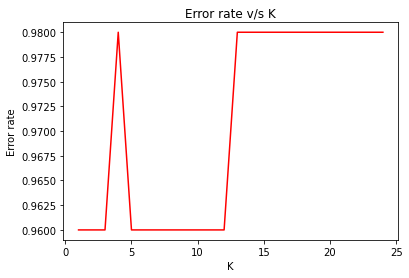

In [12]:
plt.plot(list(range(1,25)),err_list,c= 'r')
plt.title('Error rate v/s K')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.show()

In [13]:
## Here error rate is low at k-4 so select k as 4
### Model BUilding
model = KNeighborsClassifier(n_neighbors=4)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [14]:
y_pred

array([ 4, 10, 11, 35, 12, 10, 77, 20, 14,  7, 59, 71, 17,  7, 46, 77, 59,
       35, 42, 46, 86, 12, 47, 74, 41, 35, 10,  8, 40, 14,  6, 46, 20, 41,
       14, 17,  1,  6, 42, 43,  5, 42, 14, 10, 22, 45,  4, 49, 46, 22],
      dtype=int64)

In [15]:
### Module Evalution
confusion_matrix(y_test,y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [16]:
accuracy_score(y_test,y_pred)

0.02

In [17]:
## Model Saving
import pickle

In [18]:
file = open('knn_model.pkl', 'wb')

In [19]:
pickle.dump(model, file)  


In [20]:
file.close()